In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw = pd.read_csv('./data/boston.csv')

In [4]:
raw.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## 군집화

In [7]:
#범주형 데이터 제거
del raw['chas']

In [8]:
#집값은 복수한 후 제거
medv = raw['medv']
del raw['medv']

군집화를 하기 전에 앞서 수월한 시각화 및 설명력을 첨부하기 위해 PCA를 통해 변수를 2개로 줄인다.

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [10]:
#정규화 진행
scaler = StandardScaler()

In [11]:
data = scaler.fit_transform(raw)

In [13]:
# PCA 2개 진행
pca = PCA(n_components=2)

In [14]:
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [17]:
pruned_data = pca.transform(data)

In [18]:
data2 = pd.DataFrame(pruned_data, columns = ["feature1","feature2"])
data2.head()

,feature1,feature2
0,-2.097234,-0.720179
1,-1.456003,-0.947694
2,-2.073454,-0.625336
3,-2.610161,-0.134044
4,-2.456866,-0.229919


## 몇 개로 군집화를 해야할까?

위의 데이터를 몇 개의 군집화로 나누는 것이 가장 올바른 군집화인지 살펴보자

1. KMeans
2. fit
3. inertia
4. predict

In [19]:
from sklearn.cluster import KMeans

In [22]:
x = [] #k가 몇개인지
y = [] #응집도

for k in range(1,30):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(data2)
    x.append(k)
    y.append(kmeans.inertia_)

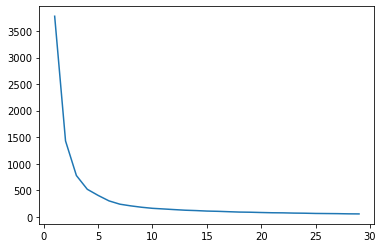

In [23]:
plt.plot(x,y)

### K=4

In [24]:
kmeans = KMeans(n_clusters=4)

In [25]:
kmeans.fit(data2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
data2['labels'] = kmeans.predict(data2)

In [28]:
data2.head()

,feature1,feature2,labels
0,-2.097234,-0.720179,0
1,-1.456003,-0.947694,0
2,-2.073454,-0.625336,0
3,-2.610161,-0.134044,0
4,-2.456866,-0.229919,0


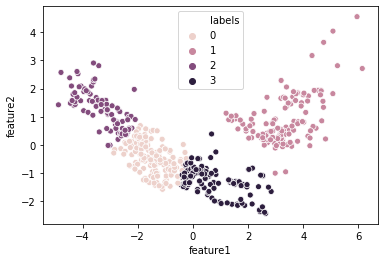

In [29]:
sns.scatterplot(x='feature1',y='feature2',hue='labels',data=data2)

## 클러스터링 결과 해석

pca와 클러스터링의 결과를 해석해본다.

어떤 그룹의 집 값이 높은지 확인한다.

In [30]:
data2['medv'] = medv

In [31]:
data2.head()

,feature1,feature2,labels,medv
0,-2.097234,-0.720179,0,24.0
1,-1.456003,-0.947694,0,21.6
2,-2.073454,-0.625336,0,34.7
3,-2.610161,-0.134044,0,33.4
4,-2.456866,-0.229919,0,36.2


In [32]:
data2[data2['labels']==0]['medv'].mean()

26.07857142857143

시각화를 위해 각 그룹별 medv 값을 따로 변수로 생성한다.

In [33]:
medv_0 = data2[data2['labels']==0]['medv'].mean()
medv_1 = data2[data2['labels']==1]['medv'].mean()
medv_2 = data2[data2['labels']==2]['medv'].mean()
medv_3 = data2[data2['labels']==3]['medv'].mean()

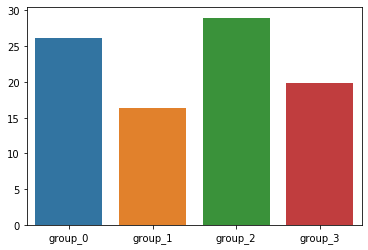

In [34]:
sns.barplot(x=['group_0','group_1','group_2','group_3'], y=[medv_0,medv_1,medv_2,medv_3])

## 그룹들의 특징을 살펴본다.
최상위 그룹과 최하위 그룹의 특징을 알아본다.

### 최상위 그룹 2번

### 최하위 그룹 1번

In [35]:
#원본 데이터에 라벨을 복제
raw['labels'] = data2['labels']

In [36]:
group = raw[(raw['labels']==1) | (raw['labels']==2)]

In [37]:
group

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat,labels
39,0.02763,75.0,2.95,0.428,6.595,21.8,5.4011,3.0,252.0,18.3,395.63,4.32,2
40,0.03359,75.0,2.95,0.428,7.024,15.8,5.4011,3.0,252.0,18.3,395.62,1.98,2
41,0.12744,0.0,6.91,0.448,6.770,2.9,5.7209,3.0,233.0,17.9,385.41,4.84,2
52,0.05360,21.0,5.64,0.439,6.511,21.1,6.8147,4.0,243.0,16.8,396.90,5.28,2
53,0.04981,21.0,5.64,0.439,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,3.67367,0.0,18.10,0.583,6.312,51.9,3.9917,24.0,666.0,20.2,388.62,10.58,1
486,5.69175,0.0,18.10,0.583,6.114,79.8,3.5459,24.0,666.0,20.2,392.68,14.98,1
487,4.83567,0.0,18.10,0.583,5.905,53.2,3.1523,24.0,666.0,20.2,388.22,11.45,1
489,0.18337,0.0,27.74,0.609,5.414,98.3,1.7554,4.0,711.0,20.1,344.05,23.97,1


In [39]:
group = group.groupby('labels').mean().reset_index()

In [40]:
group

,labels,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,1,12.571770,0.0000,18.243881,0.671470,6.010679,89.929851,2.05719,23.701493,666.671642,20.198507,288.733209,18.723358
1,2,0.065128,54.1875,3.750909,0.423147,6.722830,29.660227,6.91729,4.159091,305.420455,16.982955,389.006818,6.153409


### subplot

여러가지의 그림을 그리는 방법

In [46]:
columns = group.columns
columns

Index(['labels', 'crim', 'zn', 'indus', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'b', 'lstat'],
      dtype='object')

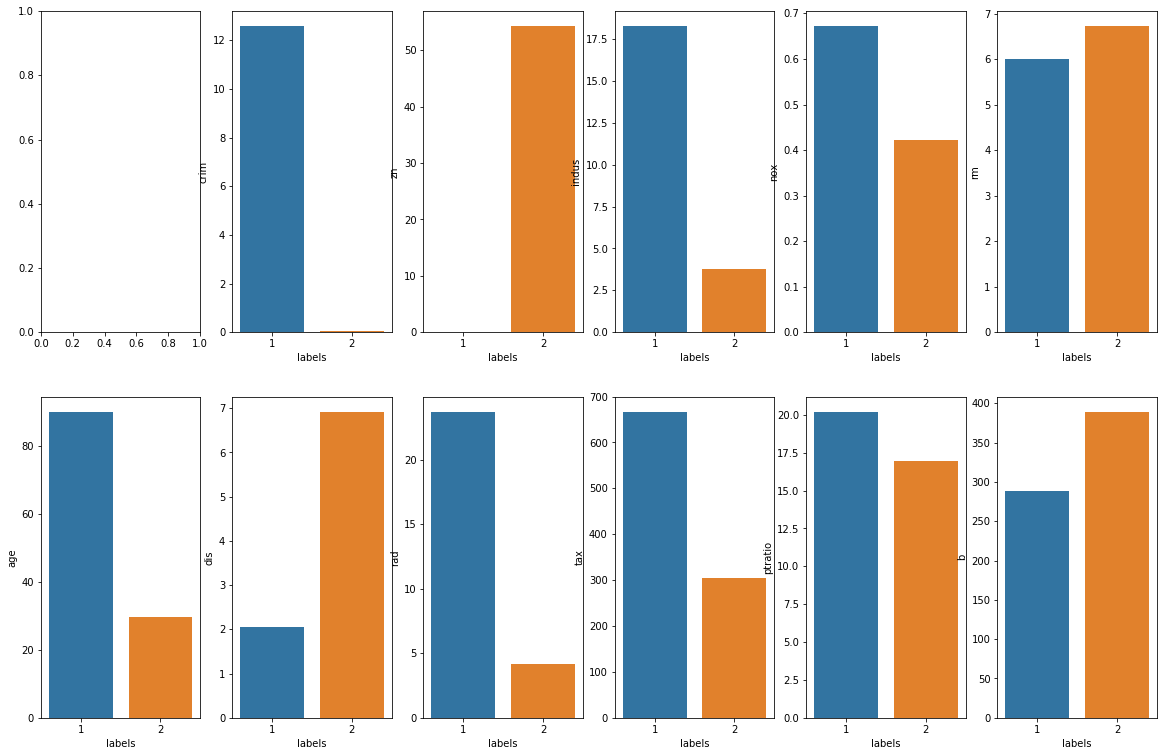

In [47]:
fig, ax = plt.subplots(2,6, figsize=(20,13))

for i in range(1,12):
    sns.barplot(x='labels',y=columns[i],data=group, ax= ax[i//6, i%6])

## 결론

그래프에서 보이다 싶이 범죄율이 낮을 수록, 평방비트를 초과 거주지역 비율이 높을수록 좋은 가격을 나타내는 지역임을 알 수 있다. <br>

또한, 두가지 뿐 아니라 여러가지의 그래프를 보고도 집 값이 높은 지역의 특징을 알 수 있다.